In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv("RadioJavan_top.csv")
data
data.head(), data.describe(), data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artistName        625 non-null    object 
 1   musicName         625 non-null    object 
 2   Radiojavan_play   625 non-null    int64  
 3   Radiojavan_likes  625 non-null    int64  
 4   pubdate           625 non-null    object 
 5   popularity        625 non-null    int64  
 6   danceability      625 non-null    float64
 7   energy            625 non-null    float64
 8   loudness          625 non-null    float64
 9   speechiness       625 non-null    float64
 10  acousticness      625 non-null    float64
 11  instrumentalness  625 non-null    float64
 12  liveness          625 non-null    float64
 13  valence           625 non-null    float64
 14  tempo             625 non-null    float64
 15  duration_ms       625 non-null    int64  
dtypes: float64(9), int64(4), object(3)
memory us

(       artistName           musicName  Radiojavan_play  Radiojavan_likes  \
 0            Sasy           Gentleman         97011366             92837   
 1  Mohsen Yeganeh    Behet Ghol Midam         82238605             92258   
 2     Behnam Bani      Ashegham Karde         68372476             66724   
 3           Masih  To Ke Nisti Pisham         68357479             93209   
 4           Masih        100 Rishteri         68074878             50030   
 
        pubdate  popularity  danceability  energy  loudness  speechiness  \
 0   Mar 6 2019          50         0.847   0.899    -2.807       0.1750   
 1  Feb 29 2016          50         0.794   0.539    -8.058       0.0458   
 2  Mar 11 2017          42         0.749   0.914    -3.084       0.1240   
 3  Mar 13 2017          42         0.723   0.837    -5.779       0.1680   
 4  Mar 16 2019          44         0.766   0.790    -6.484       0.2020   
 
    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  


In [3]:
mean_energy = data['energy'].mean()
mean_danceability = data['danceability'].mean()
mean_tempo = data['tempo'].mean()

mean_energy, mean_danceability, mean_tempo

(0.7018647040000001, 0.66697296, 120.40730720000002)

مقادیر میانگین برای ویژگی های مشخص شده عبارتند از:

انرژی: 0.7لیت ی بودنرقص: 0.67
سرعت: 120.41 BPM
این مقادیر نشان می‌دهند که آهنگ‌های موجود در این مجموعه داده‌ها عموماً پرانرژی و قابل رقص هستند و سرعت نسبتاً بالایی دارند. در حالی که این به طور قطعی "شادی" را نشان نمی دهد، اما به این معنی است که این آهنگ ها احتمالاً احساس خوشایندی دارند که می تواند با موسیقی مثبت یا زنده همراه باشد.

In [4]:
variance_energy = data['energy'].var()
variance_danceability = data['danceability'].var()
variance_tempo = data['tempo'].var()
variance_liveness = data['liveness'].var()
variance_energy, variance_danceability, variance_tempo, variance_liveness

(0.025196502014375382,
 0.018325529091384615,
 642.0380993766308,
 0.023336971387846156)


واریانس برای ویژگی زنده بودن تقریباً 0.023 است. این واریانس نسبتا کم نشان می‌دهد که شنوندگان در این مجموعه داده‌ها ترجیحات مشابهی در مورد زنده بودن آهنگ‌ها دارند، که نشان‌دهنده تمایل به آهنگ‌هایی با سطوح ثابت یا قابل پیش‌بینی عناصر صدای زنده است همچنین انرزی و رقصی بودن آهنگ ترجیحات مشابهی دارند اما برای تمپو خیلی شباهت ندارند.

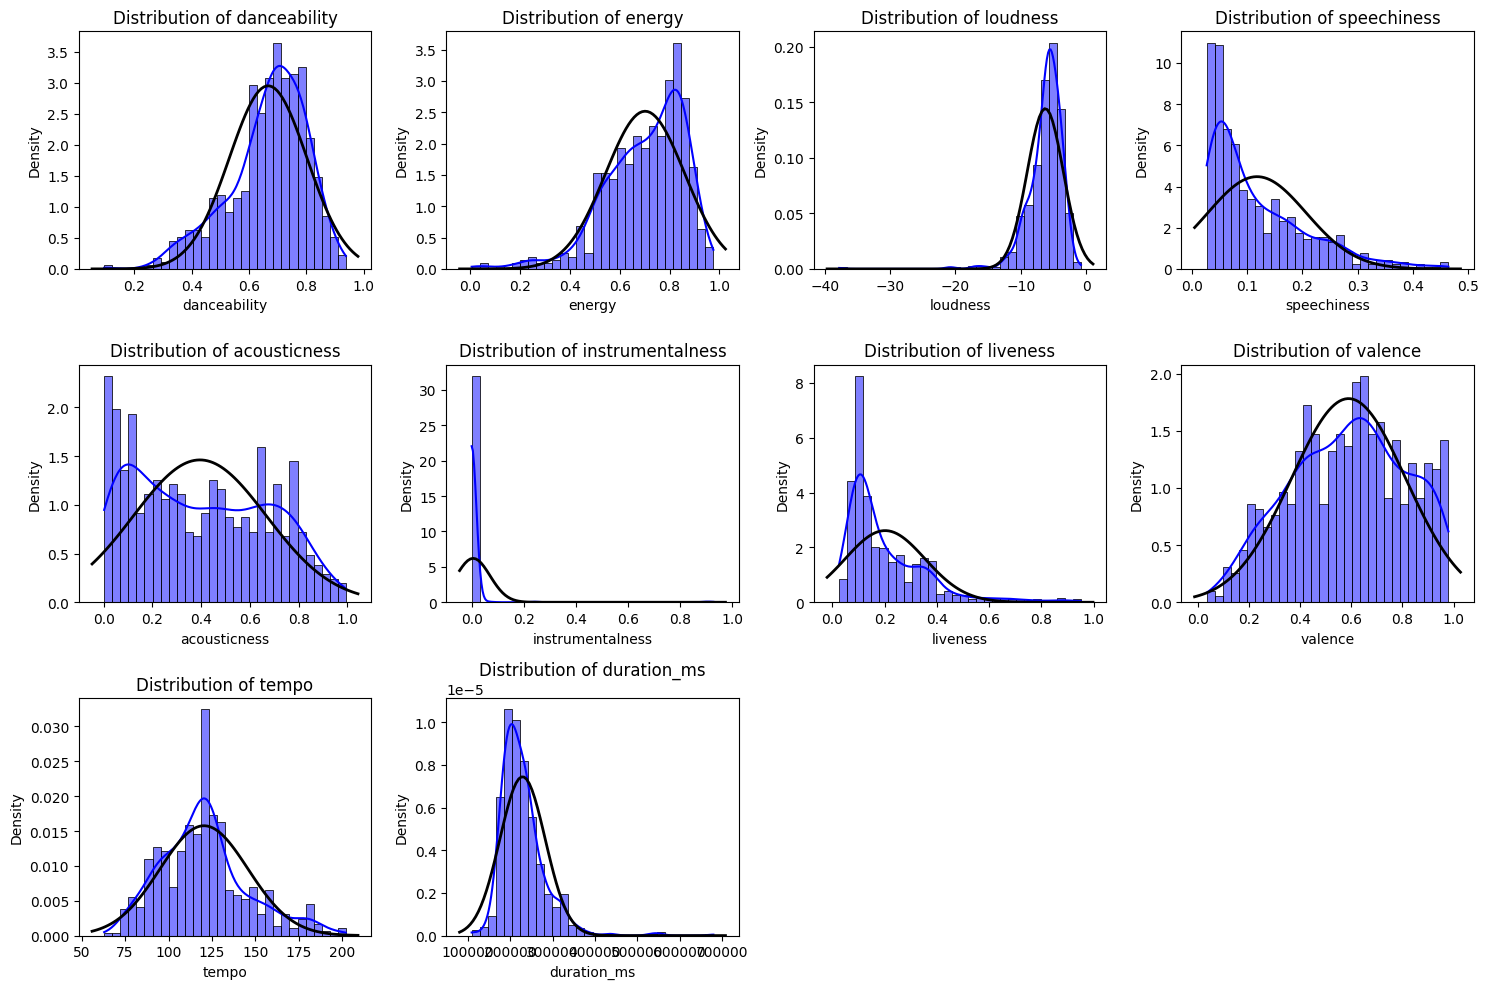

In [5]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'duration_ms']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    
    sns.histplot(data[feature], kde=True, stat="density", color='blue', bins=30)
    
    mu, std = stats.norm.fit(data[feature])
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

باتوجه به نمودار ها رقصی بودن و تمپو و ولنس و انرژی نرمال تر هستند.

In [6]:
correlation_matrix = data[features].corr()

print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

threshold = 0.8
to_remove = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_remove.add(colname)

df_reduced = data.drop(columns=to_remove)

print("Features to remove due to high correlation:", to_remove)
print("New DataFrame shape:", df_reduced.shape)

Pearson Correlation Coefficient Matrix:
                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.406512  0.262377     0.169025     -0.486365   
energy                0.406512  1.000000  0.724982     0.307914     -0.501349   
loudness              0.262377  0.724982  1.000000     0.189409     -0.318227   
speechiness           0.169025  0.307914  0.189409     1.000000     -0.216391   
acousticness         -0.486365 -0.501349 -0.318227    -0.216391      1.000000   
instrumentalness     -0.124771 -0.275518 -0.495795    -0.064755      0.145500   
liveness              0.023998  0.202328  0.138974     0.131482     -0.186237   
valence               0.432599  0.533743  0.368717     0.241614     -0.208721   
tempo                -0.137369  0.071591  0.056946     0.175428     -0.100038   
duration_ms          -0.129133 -0.205042 -0.305398    -0.047655      0.192942   

                  instrumentalness  liveness   valence     tempo  du

In [7]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

correlation_matrix_scaled = data[features].corr()

threshold = 0.8
to_remove_scaled = set()

for i in range(len(correlation_matrix_scaled.columns)):
    for j in range(i):
        if abs(correlation_matrix_scaled.iloc[i, j]) > threshold:
            colname = correlation_matrix_scaled.columns[i]
            to_remove_scaled.add(colname)

df_reduced_scaled = data.drop(columns=to_remove_scaled)

print("Features to remove due to high correlation after scaling:", to_remove_scaled)
print("New DataFrame shape after scaling:", df_reduced_scaled.shape)

Features to remove due to high correlation after scaling: set()
New DataFrame shape after scaling: (625, 16)


خیر تغییری ایجادنشد
تأثیر scaling:
مقیاس‌گذاری می‌تواند بر ضرایب همبستگی بین ویژگی‌ها تأثیر بگذارد، به‌ویژه اگر ویژگی‌های اصلی محدوده یا توزیع متفاوتی داشته باشند.
تفسیر: اگر پس از مقیاس‌بندی، ویژگی‌های یکسانی برای حذف شناسایی شوند، نشان‌دهنده این است که روابط بین آنها علی‌رغم مقیاس‌گذاری ثابت باقی می‌ماند. برعکس، اگر ویژگی‌های مختلف حذف شوند، به این معنی است که مقیاس‌بندی روابط بین ویژگی‌ها را تغییر داده است.

In [8]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

data['score'] = data[features].sum(axis=1)

top_tracks = data.nlargest(5, 'score')

print("Top Five Tracks:")
print(top_tracks[['artistName', 'musicName', 'score']])

Top Five Tracks:
          artistName            musicName     score
373           TM Bax            Ni Copito  5.989218
87   Mohsen Chavoshi    Bist Hezar Arezoo  5.877466
164      Behnam Bani  Vay Dele Bighararam  5.805965
187              Yas              Sarkoob  5.625060
176            Donya                 Tala  5.621484


 توضیح روش
**نرمال‌سا**: با مقیاس‌بندی ویژگی‌ها، اطمینان حاصل می‌کنیم که هیچ ویژگی به‌طور نامتناسبی بر امتیاز تأثیر نمی‌گذارد. این کار امکان مقایسه عادلانه بین ویژگی‌های مختلف را فراهم می‌کند.. **محاسبه اماز**: امتیاز با جمع کردن تمام مقادیر نرمال‌شده ویژگی‌ها تولید می‌شود. این روش فرض می‌کند که هر ویژگی به‌طور مساوی در کیفیت کلی قطعه موسیقی نقش دار
3. **انتخاب بهترینطعات**: تابع `nlargest` به شناسایی پنج قطعه برتر با بالاترین امتیاز کمک می‌کند. این امکان را می‌دهد که به سرعت بهترین قطعات را بر اساس سیستم امتیازدهی خود پیدا کنیم.

In [9]:

weights = {
    'danceability': 2,  # Higher weight
    'energy': 2,        # Higher weight
    'liveness': -1,     # Lower weight
    'acousticness': -1   # Lower weight
}

data['weighted_score'] = (
    data['danceability'] * weights['danceability'] +
    data['energy'] * weights['energy'] +
    data['liveness'] * weights['liveness'] +
    data['acousticness'] * weights['acousticness']
)

mean_danceability = data['danceability'].mean()
mean_energy = data['energy'].mean()
mean_liveness = data['liveness'].mean()
mean_acousticness = data['acousticness'].mean()

recommended_tracks = data[
    (data['danceability'] > mean_danceability) &
    (data['energy'] > mean_energy) &
    (data['liveness'] < mean_liveness) &
    (data['acousticness'] < mean_acousticness)
]

top_tracks = recommended_tracks.nlargest(5, 'weighted_score')

print("Top Recommended Tracks:")
print(top_tracks[['artistName', 'musicName', 'weighted_score']])

Top Recommended Tracks:
       artistName     musicName  weighted_score
473  Hamid Hiraad  Shab Ke Shod        3.583564
389         Baran      100 Baar        3.497146
200        Ho3ein     12 Be Bad        3.495521
446        Ho3ein     12 Be Bad        3.495521
584        Ho3ein     12 Be Bad        3.495521


In [10]:
weights = {
    'danceability': -1,  # Higher weight
    'energy': -1,        # Higher weight
    'liveness': 2,     # Lower weight
    'acousticness': 2   # Lower weight
}

data['weighted_score'] = (
    data['danceability'] * weights['danceability'] +
    data['energy'] * weights['energy'] +
    data['liveness'] * weights['liveness'] +
    data['acousticness'] * weights['acousticness']
)

mean_danceability = data['danceability'].mean()
mean_energy = data['energy'].mean()
mean_liveness = data['liveness'].mean()
mean_acousticness = data['acousticness'].mean()

recommended_tracks = data[
    (data['danceability'] > mean_danceability) &
    (data['energy'] > mean_energy) &
    (data['liveness'] < mean_liveness) &
    (data['acousticness'] < mean_acousticness)
]

top_tracks = recommended_tracks.nlargest(5, 'weighted_score')

print("Top Recommended Tracks:")
print(top_tracks[['artistName', 'musicName', 'weighted_score']])

Top Recommended Tracks:
           artistName           musicName  weighted_score
294        Sami Beigi       Karet Nadaram       -0.494094
159  Sina Shabankhani        Jadooye Khas       -0.589945
81        Behnam Bani       Alagheye Khas       -0.598682
40   Alireza Talischi  Akharesh Ghashange       -0.599494
296      Hoorosh Band       Edame Midamet       -0.700836


خب من فقط تغییر دادم وزن را و در کل انتخاب آهنگ پیشنهادی به اینکه من چقدر دقیق به وزن دهی توجه کنم و همچنین فیچر هایی که انتخاب کردم چیا هستند همچنین کیفیت داده و حس حال من از سبک موسیقی میتونه تفاوت ایجاد کنه و حتی بهترین الگوریتم ها همه نتونن یک آهنگ به من پیشنهاد بدهندو من خوشم بیاد یا نیاد

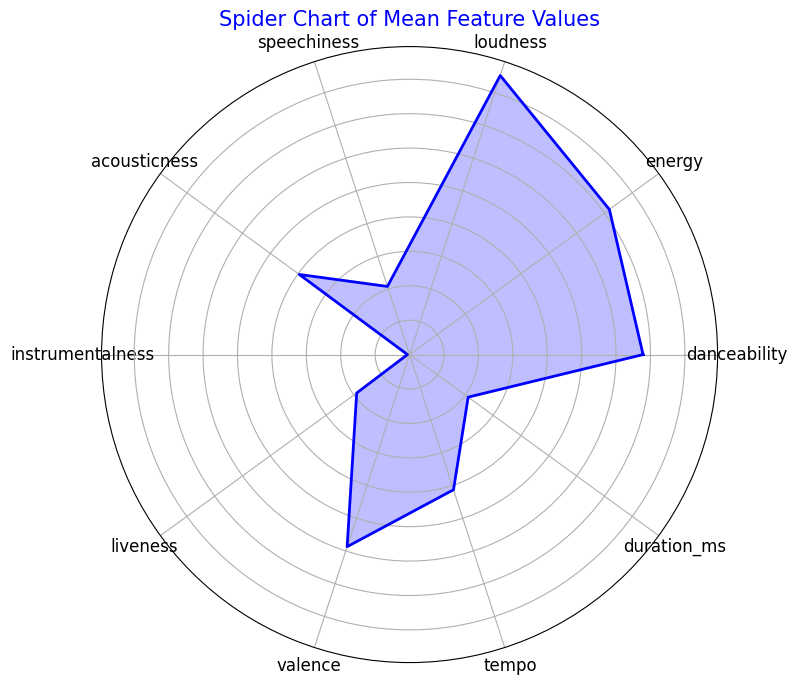

In [11]:
mean_values = data[features].mean().values

num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()

mean_values = np.concatenate((mean_values, [mean_values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, mean_values, color='blue', alpha=0.25)
ax.plot(angles, mean_values, color='blue', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=12)

plt.title('Spider Chart of Mean Feature Values', size=15, color='blue')

plt.show()

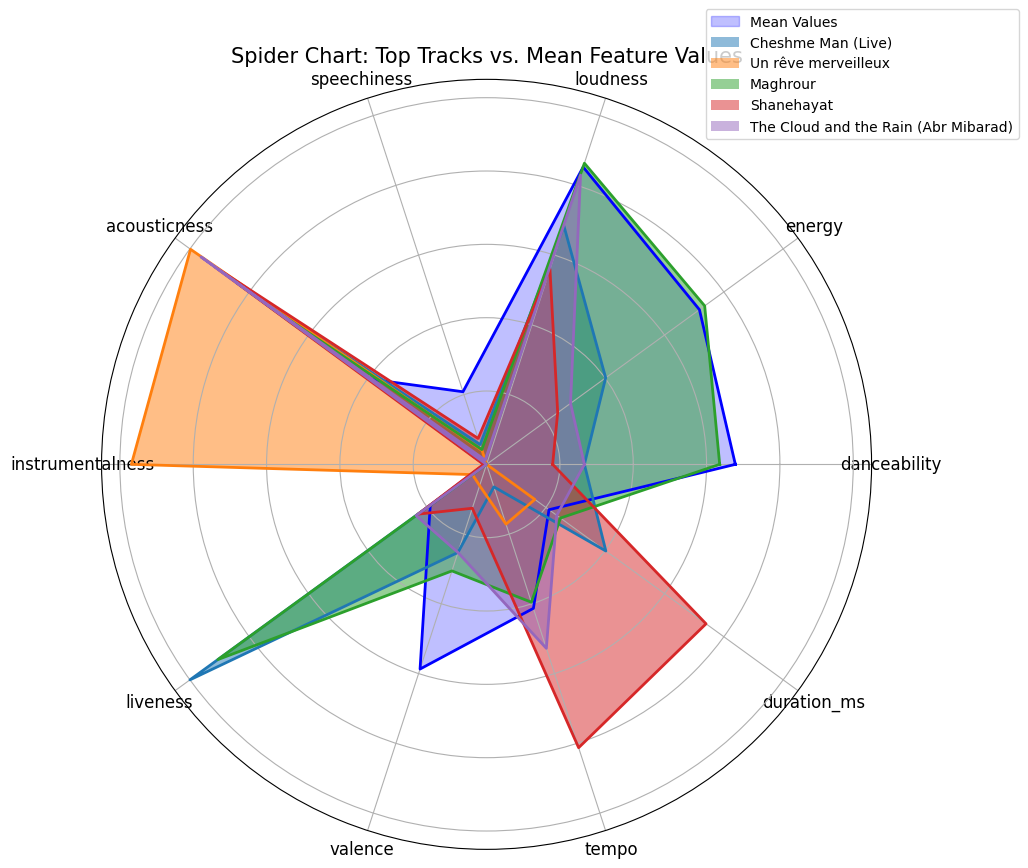

In [12]:
top_tracks = data.nlargest(5, 'weighted_score')  


features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

mean_values = data[features].mean().values

num_features = len(features)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
mean_values = np.concatenate((mean_values, [mean_values[0]]))  # Close the loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.fill(angles, mean_values, color='blue', alpha=0.25, label='Mean Values')
ax.plot(angles, mean_values, color='blue', linewidth=2)

for index, track in top_tracks.iterrows():
    track_values = track[features].values
    track_values = np.concatenate((track_values, [track_values[0]]))  # Close the loop
    ax.fill(angles, track_values, alpha=0.5, label=track['musicName'])
    ax.plot(angles, track_values, linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=12)
plt.title('Spider Chart: Top Tracks vs. Mean Feature Values', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.show()

نمودار عنکبوتی به صورت بصری مقادیر پنج آهنگ پیشنهادی رو با میانگین کل مقایسه میکنه و هر آهنگ با رنگ و الگو خاصی نشون داده شده و میتوانیم نگاه کنیم که هر انگ با توجه به آن وزن ها چطور بوده و چقدر از انتظار ما دور یا نزدیک است.